# Tarea 1 Punto 3

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import tarfile
import zipfile
from scipy.io import loadmat
from urllib.request import urlretrieve
from os.path import isfile, isdir
import seaborn as sns; sns.set()
%matplotlib inline

In [6]:
def download_files():
    """
    Este metodo descarga los archivos de imagenes sino existen
    """
    path_tar = os.path.join("data",'faces.zip')
    if not isfile(path_tar):
        urlretrieve(
            'http://courses.media.mit.edu/2002fall/mas622j/proj/faces/rawdata.zip',
            path_tar)
    dest_path =  "data/faces"
    with zipfile.ZipFile(path_tar) as tar:
        tar.extractall(dest_path)
        tar.close()
download_files()

## 3.1 Calcular la mean face

In [7]:
from scipy.io import loadmat
import glob
import random
import matplotlib.image as img
#Install pillow
from PIL import Image

d_name = 'data/faces/rawdata'
sample = 0.2
X = []
for nfile in  os.listdir(d_name):
    if random.random() <= sample:
        bytes_read = open(os.path.join(d_name,nfile), "rb").read()
        img = Image.frombytes('L', (128,128), bytes_read)
        X.append(np.array(img).flatten())

X = np.array(X)

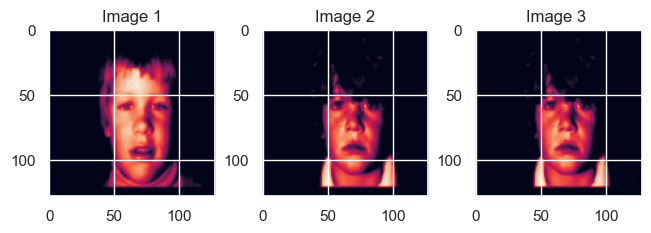

In [8]:
def plot_1_images(data, label="Image 1", ax=None):
    fn_shape = lambda X: X.reshape(128,128)
    fig = None
    if ax is None:
        fig, ax = plt.subplots(1,1, constrained_layout=True)
    ax.imshow(fn_shape(data))
    ax.set_title(label=label)
    return fig,ax

def plot_2_images(data, label="Image 2", ax=None):
    fn_shape = lambda X: X.reshape(128,128)
    fig = None
    if ax is None:
        fig, ax = plt.subplots(1,1, constrained_layout=True)
    ax.imshow(fn_shape(data))
    ax.set_title(label=label)
    return fig,ax

def plot_3_images(data, label="Image 3", ax=None):
    fn_shape = lambda X: X.reshape(128,128)
    fig = None
    if ax is None:
        fig, ax = plt.subplots(1,1, constrained_layout=True)
    ax.imshow(fn_shape(data))
    ax.set_title(label=label)
    return fig,ax

def plot_4_images(data, label="Image 4", ax=None):
    fn_shape = lambda X: X.reshape(128,128)
    fig = None
    if ax is None:
        fig, ax = plt.subplots(1,1, constrained_layout=True)
    ax.imshow(fn_shape(data))
    ax.set_title(label=label)
    return fig,ax
 
def plot_5_images(data, label="Image 5", ax=None):
    fn_shape = lambda X: X.reshape(128,128)
    fig = None
    if ax is None:
        fig, ax = plt.subplots(1,1, constrained_layout=True)
    ax.imshow(fn_shape(data))
    ax.set_title(label=label)
    return fig,ax

def plot_13_images(data,ix_1, ix_2 , ix_3):
    fn_shape = lambda X: X.reshape(128,128)
    fig, ax = plt.subplots(1,3, constrained_layout=True)
    ax[0].imshow(fn_shape(data[ix_1]))
    ax[0].set_title(label="Image %s"% ix_1)
    ax[1].imshow(fn_shape(data[ix_2]))
    ax[1].set_title(label="Image %s"% ix_2)
    ax[2].imshow(fn_shape(data[ix_2]))
    ax[2].set_title(label="Image %s "% ix_3)
    plt.show()
plot_13_images(X, 1, 2 , 3)

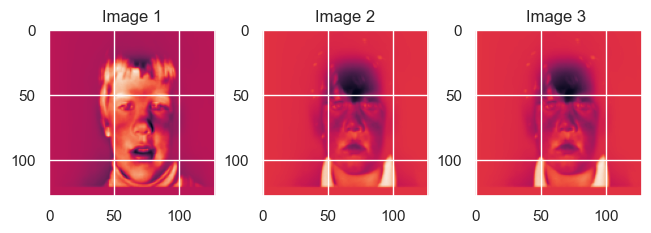

In [9]:
X_mean = X.mean(axis=0)
X_center = X - X_mean
plot_13_images(X_center,1, 2 ,3)

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Image 1'}>)

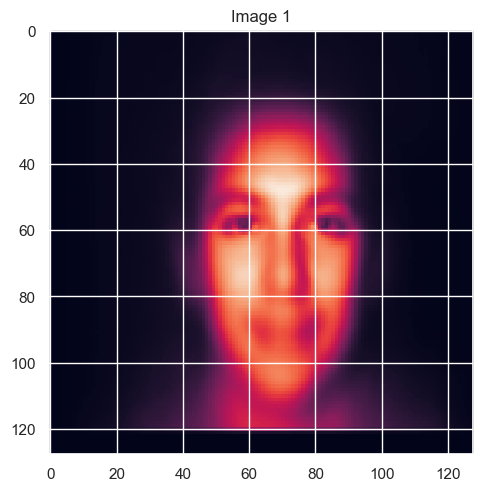

In [10]:
plot_1_images(X_mean)

## 3.2 Calcular las componentes de las caracteristicas y reconstruir las caras con los resultados

In [11]:
from sklearn.decomposition import PCA
pca = PCA()
# images x dim
X_reduced = pca.fit_transform(X_center)

In [12]:
eigen_values = pca.explained_variance_
eigen_faces = pca.components_

### Para el 90%

In [16]:
variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(variance_ratio_cumulative >= 0.95) + 1
print("Número de componentes necesarios para mantener el 90% de la varianza:", n_components)

Número de componentes necesarios para mantener el 90% de la varianza: 135


### Para el 99%

In [14]:
variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)
n_components_99 = np.argmax(variance_ratio_cumulative >= 0.99) + 1
print("Número de componentes necesarios para mantener el 99% de la varianza:", n_components_99)

Número de componentes necesarios para mantener el 99% de la varianza: 355


(None, <Axes: title={'center': 'Con 361/99% eigenfaces'}>)

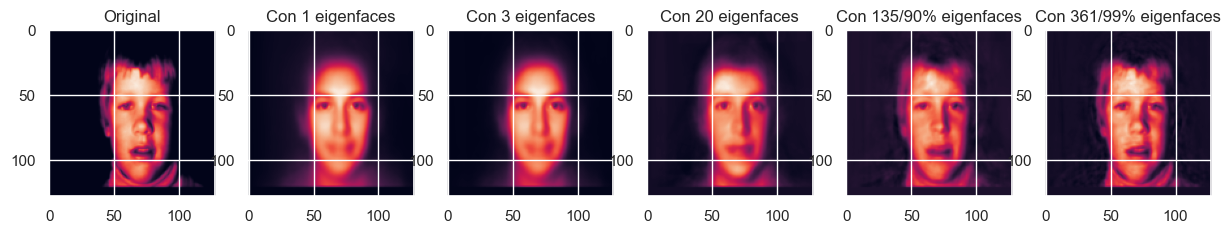

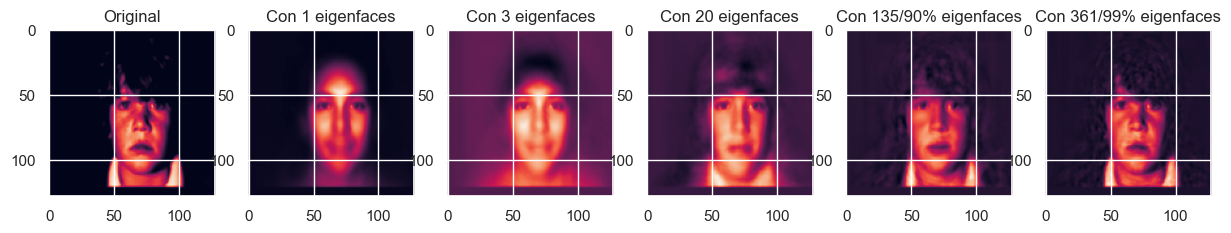

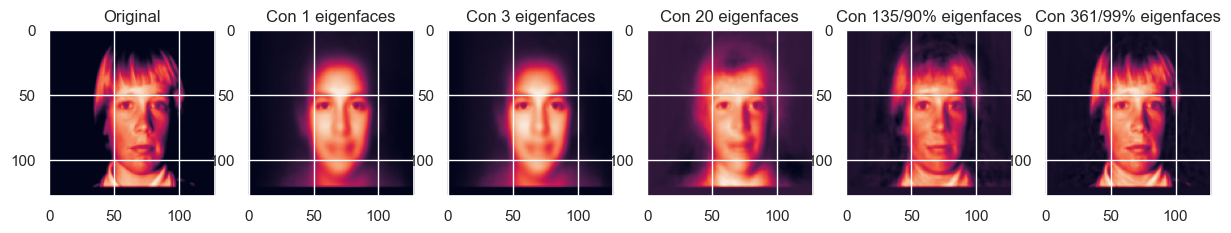

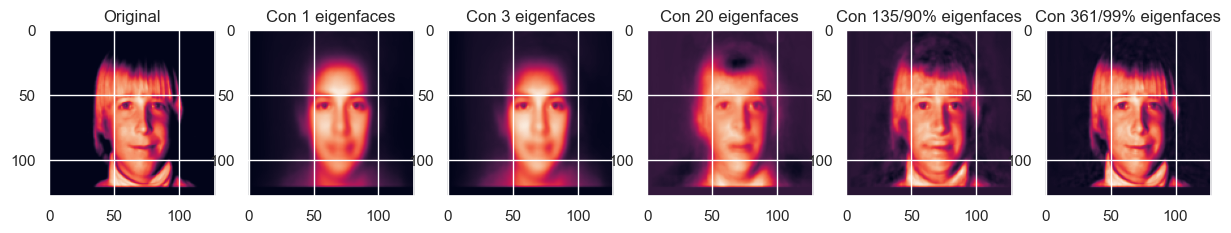

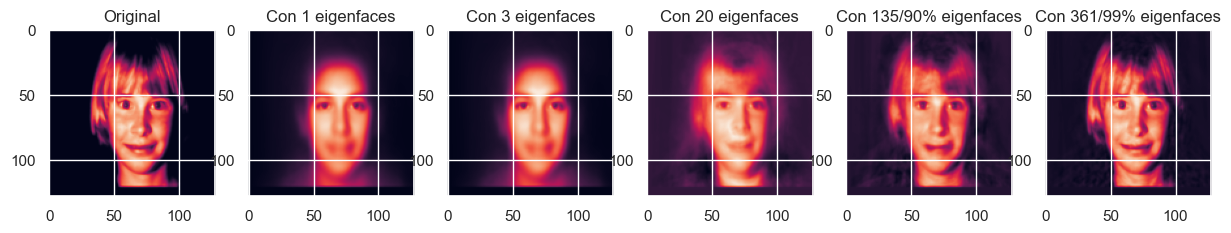

In [20]:
face_original_1= X[1]
face_1_1 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:1],
                                 eigen_faces[:1,:]),
                            axis=0)
face_1_5 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:3],
                                      eigen_faces[:3,:]),
                               axis=0)


face_1_10 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:20],
                                      eigen_faces[:20,:]),
                               axis=0)

face_1_64 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:135],
                                     eigen_faces[:135,:]),
                              axis=0)

face_1_361 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:361],
                                     eigen_faces[:361,:]),
                              axis=0)
##############################################################################

face_original_2= X[2]
face_2_1 = X_mean + np.sum(np.dot(X_reduced[2].reshape(1,-1)[:,:1],
                                 eigen_faces[:1,:]),
                            axis=0)
face_2_5 = X_mean + np.sum(np.dot(X_reduced[2].reshape(1,-1)[:,:3],
                                      eigen_faces[:3,:]),
                               axis=0)


face_2_10 = X_mean + np.sum(np.dot(X_reduced[2].reshape(1,-1)[:,:20],
                                      eigen_faces[:20,:]),
                               axis=0)

face_2_64 = X_mean + np.sum(np.dot(X_reduced[2].reshape(1,-1)[:,:135],
                                     eigen_faces[:135,:]),
                              axis=0)

face_2_361 = X_mean + np.sum(np.dot(X_reduced[2].reshape(1,-1)[:,:361],
                                     eigen_faces[:361,:]),
                              axis=0)
##############################################################################

face_original_3= X[3]
face_3_1 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:1],
                                 eigen_faces[:1,:]),
                            axis=0)
face_3_5 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:3],
                                      eigen_faces[:3,:]),
                               axis=0)


face_3_10 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:20],
                                      eigen_faces[:20,:]),
                               axis=0)

face_3_64 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:135],
                                     eigen_faces[:135,:]),
                              axis=0)

face_3_361 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:361],
                                     eigen_faces[:361,:]),
                              axis=0)
##############################################################################

face_original_4= X[4]
face_4_1 = X_mean + np.sum(np.dot(X_reduced[4].reshape(1,-1)[:,:1],
                                 eigen_faces[:1,:]),
                            axis=0)
face_4_5 = X_mean + np.sum(np.dot(X_reduced[4].reshape(1,-1)[:,:3],
                                      eigen_faces[:3,:]),
                               axis=0)


face_4_10 = X_mean + np.sum(np.dot(X_reduced[4].reshape(1,-1)[:,:20],
                                      eigen_faces[:20,:]),
                               axis=0)

face_4_64 = X_mean + np.sum(np.dot(X_reduced[4].reshape(1,-1)[:,:135],
                                     eigen_faces[:135,:]),
                              axis=0)

face_4_361 = X_mean + np.sum(np.dot(X_reduced[4].reshape(1,-1)[:,:361],
                                     eigen_faces[:361,:]),
                              axis=0)
##############################################################################

face_original_5= X[5]
face_5_1 = X_mean + np.sum(np.dot(X_reduced[5].reshape(1,-1)[:,:1],
                                 eigen_faces[:1,:]),
                            axis=0)
face_5_5 = X_mean + np.sum(np.dot(X_reduced[5].reshape(1,-1)[:,:3],
                                      eigen_faces[:3,:]),
                               axis=0)


face_5_10 = X_mean + np.sum(np.dot(X_reduced[5].reshape(1,-1)[:,:20],
                                      eigen_faces[:20,:]),
                               axis=0)

face_5_64 = X_mean + np.sum(np.dot(X_reduced[5].reshape(1,-1)[:,:135],
                                     eigen_faces[:135,:]),
                              axis=0)

face_5_361 = X_mean + np.sum(np.dot(X_reduced[5].reshape(1,-1)[:,:361],
                                     eigen_faces[:361,:]),
                              axis=0)


fig, ax = plt.subplots(1,6,figsize=(15,15))
plot_1_images(face_original_1, ax=ax[0], label="Original")
plot_1_images(face_1_1,ax=ax[1],label="Con 1 eigenfaces")
plot_1_images(face_1_5,ax=ax[2],label="Con 3 eigenfaces")
plot_1_images(face_1_10,ax=ax[3],label="Con 20 eigenfaces")
plot_1_images(face_1_64,ax=ax[4],label="Con 135/90% eigenfaces")
plot_1_images(face_1_361,ax=ax[5],label="Con 361/99% eigenfaces")
##############################################################
fig, ax = plt.subplots(1,6,figsize=(15,15))
plot_2_images(face_original_2, ax=ax[0], label="Original")
plot_2_images(face_2_1,ax=ax[1],label="Con 1 eigenfaces")
plot_2_images(face_2_5,ax=ax[2],label="Con 3 eigenfaces")
plot_2_images(face_2_10,ax=ax[3],label="Con 20 eigenfaces")
plot_2_images(face_2_64,ax=ax[4],label="Con 135/90% eigenfaces")
plot_2_images(face_2_361,ax=ax[5],label="Con 361/99% eigenfaces")
##############################################################
fig, ax = plt.subplots(1,6,figsize=(15,15))
plot_3_images(face_original_3, ax=ax[0], label="Original")
plot_3_images(face_3_1,ax=ax[1],label="Con 1 eigenfaces")
plot_3_images(face_3_5,ax=ax[2],label="Con 3 eigenfaces")
plot_3_images(face_3_10,ax=ax[3],label="Con 20 eigenfaces")
plot_3_images(face_3_64,ax=ax[4],label="Con 135/90% eigenfaces")
plot_3_images(face_3_361,ax=ax[5],label="Con 361/99% eigenfaces")
##############################################################
fig, ax = plt.subplots(1,6,figsize=(15,15))
plot_4_images(face_original_4, ax=ax[0], label="Original")
plot_4_images(face_4_1,ax=ax[1],label="Con 1 eigenfaces")
plot_4_images(face_4_5,ax=ax[2],label="Con 3 eigenfaces")
plot_4_images(face_4_10,ax=ax[3],label="Con 20 eigenfaces")
plot_4_images(face_4_64,ax=ax[4],label="Con 135/90% eigenfaces")
plot_4_images(face_4_361,ax=ax[5],label="Con 361/99% eigenfaces")
##############################################################
fig, ax = plt.subplots(1,6,figsize=(15,15))
plot_5_images(face_original_5, ax=ax[0], label="Original")
plot_5_images(face_5_1,ax=ax[1],label="Con 1 eigenfaces")
plot_5_images(face_5_5,ax=ax[2],label="Con 3 eigenfaces")
plot_5_images(face_5_10,ax=ax[3],label="Con 20 eigenfaces")
plot_5_images(face_5_64,ax=ax[4],label="Con 135/90% eigenfaces")
plot_5_images(face_5_361,ax=ax[5],label="Con 361/99% eigenfaces")

## Conclusión

Entendemos entonces que el uso de eigenvalues sobre las caras ayuda a captar los rasgos principales en las imagenes. Concluímos también que el uso de eigenfaces 